In [1]:
import geopandas as gpd
import pandas as pd
from keplergl import KeplerGl
import json

In [2]:
cities_df = pd.read_csv("worldcities.csv")
cities_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
40996,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
40997,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
40998,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
40999,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


<AxesSubplot:>

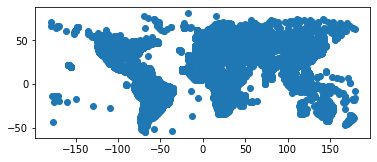

In [3]:
geometry = gpd.points_from_xy(cities_df["lng"], cities_df["lat"])
cities_gdf = gpd.GeoDataFrame(cities_df, geometry=geometry, crs="EPSG:4326")
cities_gdf.plot()

<AxesSubplot:>

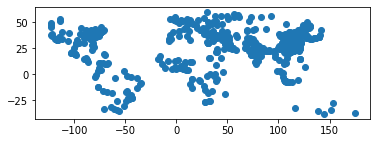

In [4]:
is_bigger_than_1_million = cities_gdf.population >= 1_000_000
cities_gdf = cities_gdf[is_bigger_than_1_million]
cities_gdf.plot()

<AxesSubplot:>

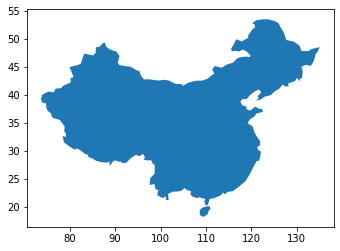

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
china = world.loc[world["name"] == "China"]["geometry"]
china = china.to_crs(epsg=4326)
china.plot()

<AxesSubplot:>

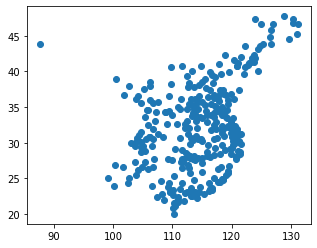

In [6]:
cities_in_china = cities_gdf.clip(china)
cities_in_china.plot()

In [7]:
cities_in_china.to_csv('cities_in_china.csv')

In [8]:
config = json.load(open('config.json'))
map = KeplerGl(config=config)
map.add_data(cities_in_china, name="china_cities")
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


C:\Users\dafydd.pearson\AppData\Roaming\Python\Python39\site-packages\jupyter_client\session.py:716: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'china_cities', 'ty…

In [11]:
map.save_to_html(file_name="index.html")

Map saved to index.html!
